In [2]:
%pip install optuna 

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install torch plotly

  Using cached torch-2.3.1-cp311-cp311-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached filelock-3.15.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-1

In [6]:
import pickle
df1=pickle.load(open("../features.pkl","rb"))

In [7]:
df1

,participantId,activity,acceleration.y.var,acceleration.y.min,acceleration.z.var,accelerationIncludingGravity.y.mean,accelerationIncludingGravity.y.min,accelerationIncludingGravity.y.max,accelerationIncludingGravity.y.median,accelerationIncludingGravity.z.mean,accelerationIncludingGravity.z.var,accelerationIncludingGravity.z.min,accelerationIncludingGravity.z.max,accelerationIncludingGravity.z.median,rotationRate.alpha.var,rotationRate.alpha.min,rotationRate.alpha.max,rotationRate.beta.var,rotationRate.gamma.var
1,10280,sitting,0.000000,0.02,0.000000,0.030000,0.03,0.03,0.03,9.840000,0.000000,9.840000,9.84,9.840,0.000000,0.000000,0.000000,0.000000,0.000000
2,10280,sitting,0.000000,0.02,0.000000,0.030000,0.03,0.03,0.03,9.843334,0.000033,9.840000,9.85,9.840,0.000000,0.000000,0.000000,0.000000,0.000000
3,10280,sitting,0.000000,0.02,0.000000,0.030000,0.03,0.03,0.03,9.845000,0.000033,9.840000,9.85,9.845,0.000000,0.000000,0.000000,0.000000,0.000000
4,10280,sitting,0.000000,0.02,0.000000,0.030000,0.03,0.03,0.03,9.846000,0.000030,9.840000,9.85,9.850,0.000000,0.000000,0.000000,0.000000,0.000000
5,10280,sitting,0.000000,0.02,0.000000,0.030000,0.03,0.03,0.03,9.846667,0.000027,9.840000,9.85,9.850,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121891,uksco,sitting,8.215636,-2.70,140.694899,-1.863636,-3.30,2.90,-2.30,-5.372727,94.776174,-32.099998,1.50,-2.100,12838.261634,-205.899994,210.300003,9344.820570,9853.118897
121892,uksco,sitting,7.480909,-2.70,129.451809,-1.908333,-3.30,2.90,-2.30,-4.991667,87.902644,-32.099998,1.50,-1.700,17064.427240,-205.899994,210.300003,13181.429436,10292.051910
121893,uksco,sitting,6.997692,-2.70,122.819735,-2.061538,-3.90,2.90,-2.30,-4.407692,85.010762,-32.099998,2.60,-1.300,17723.949377,-205.899994,210.300003,14116.102395,10373.772592
121894,uksco,sitting,6.463736,-2.70,122.307464,-2.121429,-3.90,2.90,-2.30,-3.614286,87.284389,-32.099998,6.70,-1.050,17159.300723,-205.899994,210.300003,13070.944087,10744.388508


In [66]:
from sklearn.model_selection import train_test_split

train,test  = train_test_split(df1, test_size=0.3, stratify=df1[['activity', 'participantId']])


In [24]:
test

,participantId,activity,acceleration.y.var,acceleration.y.min,acceleration.z.var,accelerationIncludingGravity.y.mean,accelerationIncludingGravity.y.min,accelerationIncludingGravity.y.max,accelerationIncludingGravity.y.median,accelerationIncludingGravity.z.mean,accelerationIncludingGravity.z.var,accelerationIncludingGravity.z.min,accelerationIncludingGravity.z.max,accelerationIncludingGravity.z.median,rotationRate.alpha.var,rotationRate.alpha.min,rotationRate.alpha.max,rotationRate.beta.var,rotationRate.gamma.var
11421,10280,sitting,0.043018,-0.940000,0.006905,0.080377,-0.820000,0.82,0.08,9.890283,0.007153,9.170000,10.20,9.90,0.387178,-2.970000,2.030000,9.194795,550.752910
15366,12417,walking,0.243534,-0.700000,0.381229,-8.848333,-9.700000,-7.80,-8.90,1.481667,0.288302,0.400000,2.50,1.50,213.746470,-45.700001,4.100000,740.233126,31.490802
56896,15338,sitting,0.001455,0.000000,0.003218,-2.308333,-2.500000,-2.20,-2.30,3.748333,0.006268,3.600000,3.90,3.75,0.058449,-0.700000,0.500000,2.490124,0.049184
107356,1d3c6,walking,7.242540,-5.700000,3.986268,-7.803333,-10.300000,-3.80,-8.25,-0.181667,1.687285,-2.800000,2.10,-0.35,635.368839,-58.299999,39.900002,2330.695617,7686.193596
62156,15338,walking,7.053658,-12.100000,19.058065,-8.780000,-19.900000,-3.40,-8.65,0.065000,17.758923,-17.299999,8.10,0.85,4946.788149,-146.600006,133.000000,5273.886254,2534.005428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88552,1d22c,sitting,0.001270,-0.130000,0.012179,8.863733,8.760000,8.96,8.86,4.070267,0.013151,3.770000,4.33,4.08,1.420255,-2.610000,2.480000,0.858660,0.314938
61037,15338,sitting,0.000322,0.100000,0.002486,-2.401639,-2.500000,-2.30,-2.40,3.624590,0.001885,3.600000,3.70,3.60,0.023158,-0.400000,0.200000,0.223169,0.024301
50768,14368u,walking,60.638002,-29.200001,35.359726,-10.402222,-36.599998,0.90,-10.60,-1.091111,30.462647,-24.600000,9.50,-0.20,4673.184260,-158.000000,92.599998,7811.606931,5580.706316
74538,15338,standing,0.001523,-0.200000,0.002517,-7.143333,-7.200000,-7.10,-7.10,-2.243333,0.002497,-2.300000,-2.20,-2.20,0.140370,-0.600000,0.900000,0.171805,0.034056


In [23]:
groups.unique().shape

(21,)

In [70]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cv = GroupKFold(n_splits=10)

X,y,groups=train.drop(columns=["activity","participantId"]),train.activity,train.participantId

def objective(trial):
    clf=DecisionTreeClassifier(max_depth=trial.suggest_int('max_depth',1,4));
    return cross_val_score(clf,X,y,cv=cv, groups=groups, scoring="f1_macro").mean()

study= optuna.study.create_study(direction="maximize")
study.optimize(objective,n_trials=5)


[I 2024-06-18 12:05:28,264] A new study created in memory with name: no-name-ea9a4ea1-9841-4f64-a871-cb3889eb2335
[I 2024-06-18 12:05:30,075] Trial 0 finished with value: 0.493377971262664 and parameters: {'max_depth': 1}. Best is trial 0 with value: 0.493377971262664.
[I 2024-06-18 12:05:31,895] Trial 1 finished with value: 0.493377971262664 and parameters: {'max_depth': 1}. Best is trial 0 with value: 0.493377971262664.
[I 2024-06-18 12:05:36,512] Trial 2 finished with value: 0.5024893771882548 and parameters: {'max_depth': 4}. Best is trial 2 with value: 0.5024893771882548.
[I 2024-06-18 12:05:38,308] Trial 3 finished with value: 0.493377971262664 and parameters: {'max_depth': 1}. Best is trial 2 with value: 0.5024893771882548.
[I 2024-06-18 12:05:40,105] Trial 4 finished with value: 0.493377971262664 and parameters: {'max_depth': 1}. Best is trial 2 with value: 0.5024893771882548.


In [50]:
%pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
from imblearn.under_sampling import EditedNearestNeighbours

sample = RandomUnderSampler(replacement=False)

train_resampled, y_resampled = sample.fit_resample(train, y)

cv = GroupKFold(n_splits=10)

X,y,groups=train_resampled.drop(columns=["activity","participantId"]),train_resampled.activity,train_resampled.participantId

def objective(trial):
    clf=DecisionTreeClassifier(max_depth=trial.suggest_int('max_depth',1,10));
    return cross_val_score(clf,X,y,cv=cv, groups=groups, scoring="f1_macro").mean()

study= optuna.study.create_study(direction="maximize")
study.optimize(objective,n_trials=5)

[I 2024-06-18 12:05:46,599] A new study created in memory with name: no-name-8a91e0a2-e81b-4c1a-b420-aa2ba78ac4d0
[I 2024-06-18 12:05:47,378] Trial 0 finished with value: 0.21374158914153268 and parameters: {'max_depth': 1}. Best is trial 0 with value: 0.21374158914153268.
[I 2024-06-18 12:05:48,151] Trial 1 finished with value: 0.21374158914153268 and parameters: {'max_depth': 1}. Best is trial 0 with value: 0.21374158914153268.
[I 2024-06-18 12:05:50,085] Trial 2 finished with value: 0.47855868610547664 and parameters: {'max_depth': 4}. Best is trial 2 with value: 0.47855868610547664.
[I 2024-06-18 12:05:51,268] Trial 3 finished with value: 0.5451438894015327 and parameters: {'max_depth': 2}. Best is trial 3 with value: 0.5451438894015327.
[I 2024-06-18 12:05:54,398] Trial 4 finished with value: 0.4682634727910041 and parameters: {'max_depth': 8}. Best is trial 3 with value: 0.5451438894015327.


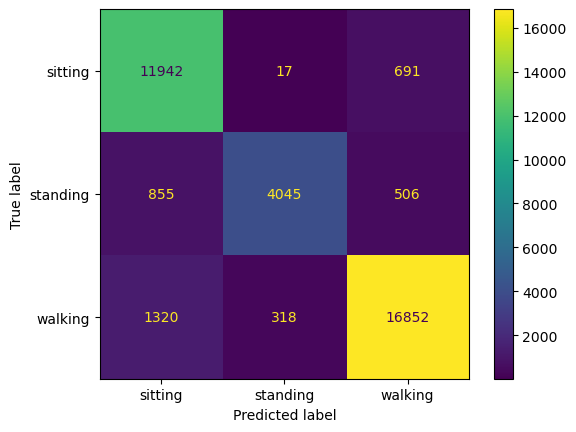

In [95]:
clf=DecisionTreeClassifier(max_depth=study.best_params["max_depth"])

clf.fit(train_resampled.drop(columns=["activity","participantId"]),train_resampled.activity)
cm = confusion_matrix(test.activity, clf.predict(test.drop(columns=["activity","participantId"])))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=train_resampled.activity.unique()).plot()

[Text(0.5, 0.8333333333333334, 'acceleration.y.var <= 0.413\ngini = 0.667\nsamples = 37848\nvalue = [12616, 12616, 12616]\nclass = sitting'),
 Text(0.25, 0.5, 'accelerationIncludingGravity.y.max <= -4.2\ngini = 0.543\nsamples = 24522\nvalue = [11982, 11407, 1133]\nclass = sitting'),
 Text(0.125, 0.16666666666666666, 'gini = 0.049\nsamples = 9627\nvalue = [19, 9386, 222]\nclass = standing'),
 Text(0.375, 0.16666666666666666, 'gini = 0.333\nsamples = 14895\nvalue = [11963, 2021, 911]\nclass = sitting'),
 Text(0.75, 0.5, 'accelerationIncludingGravity.z.max <= 6.15\ngini = 0.247\nsamples = 13326\nvalue = [634, 1209, 11483]\nclass = walking'),
 Text(0.625, 0.16666666666666666, 'gini = 0.527\nsamples = 2528\nvalue = [153, 887, 1488]\nclass = walking'),
 Text(0.875, 0.16666666666666666, 'gini = 0.14\nsamples = 10798\nvalue = [481, 322, 9995]\nclass = walking')]

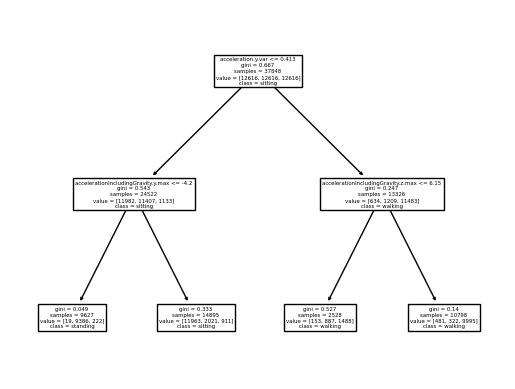

In [107]:
from sklearn import tree

tree.plot_tree(clf, feature_names=train_resampled.drop(columns=["activity","participantId"]).columns, class_names=train_resampled.activity.unique())

In [108]:
%pip install m2cgen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [114]:
import m2cgen as m2c
code = m2c.export_to_javascript(clf)

In [113]:
code

'function score(input) {\n    var var0;\n    if (input[0] <= 0.4129661023616791) {\n        if (input[5] <= -4.200000047683716) {\n            var0 = [0.0019736158720265917, 0.9749662407811364, 0.023060143346837023];\n        } else {\n            var0 = [0.8031554212823095, 0.1356831151393085, 0.06116146357838201];\n        }\n    } else {\n        if (input[10] <= 6.1499998569488525) {\n            var0 = [0.06052215189873418, 0.35087025316455694, 0.5886075949367089];\n        } else {\n            var0 = [0.04454528616410446, 0.029820337099462864, 0.9256343767364327];\n        }\n    }\n    return var0;\n}\n'